# Prediksi Student Performance Menggunakan Linear Regression dengan Genetic Algorithm

## Topik
**Prediksi Student Performance Index Menggunakan Linear Regression dengan Optimasi Algoritma Genetika untuk Feature Selection**

## Anggota Kelompok
- Muhammad Azigha Azhar (103012300143)
- Ahmad Raffi Arasy (103012330207)
- Axel Davin Lazar Panenggak (103012330386)

**Mata Kuliah:** Kecerdasan Artifisial (CAK3DAR3)  
**Semester:** Ganjil 2025/2026  
**Institusi:** Universitas Telkom

**Integrasi Metode:**
- **Metode Learning:** Linear Regression (Supervised Learning - Regression)
- **Algoritma Genetika:** Feature Selection & Optimization
- **Tujuan:** Mengintegrasikan GA untuk optimasi fitur sebelum training Linear Regression

## 1. PENDAHULUAN DAN PAPARAN DATA

### 1.1 Penjelasan Masalah
Prediksi performa akademik siswa merupakan masalah penting dalam bidang pendidikan. Dengan menggunakan machine learning, khususnya Linear Regression, kita dapat memprediksi Performance Index siswa berdasarkan faktor-faktor seperti:
- Hours Studied
- Attendance
- Sleep Duration
- Previous Scores
- Extracurricular Activities
- Motivation Level

Target prediksi adalah **Performance Index** yang merupakan ukuran performa akademik siswa. Dengan model ini, institusi pendidikan dapat:
1. Mengidentifikasi siswa yang memerlukan bimbingan tambahan
2. Memberikan rekomendasi personal untuk meningkatkan performa
3. Memahami faktor-faktor yang paling berpengaruh terhadap performa

### 1.2 Import Library dan Konfigurasi

In [132]:
# Import semua library yang diperlukan
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ Semua library berhasil diimport")

✓ Semua library berhasil diimport


### 1.3 Load dan Eksplorasi Dataset

In [133]:
# Download dataset dari Kaggle
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

# Load CSV
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)

df = pd.read_csv(csv_path)
print(f"Dataset berhasil diload dari: {csv_path}\n")
print(f"Shape Dataset: {df.shape}")
print(f"\n5 Baris Pertama Dataset:")
print(df.head())

Dataset berhasil diload dari: C:\Users\ASUS\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1\Student_Performance.csv

Shape Dataset: (10000, 6)

5 Baris Pertama Dataset:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5 

### 1.4 Paparan Data dan Statistik

In [134]:
# Informasi Dataset Lengkap
print("="*80)
print("INFORMASI DATASET LENGKAP")
print("="*80)
print(f"\nDimensi Dataset: {df.shape[0]} baris x {df.shape[1]} kolom")
print(f"\nNama-nama Kolom:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\n{'Tipe Data:'}")
print(df.dtypes)

print(f"\n{'Missing Values:'}")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  ✓ Tidak ada missing values")
else:
    print(missing[missing > 0])

print(f"\n{'Statistik Deskriptif:'}")
print(df.describe().round(3))

INFORMASI DATASET LENGKAP

Dimensi Dataset: 10000 baris x 6 kolom

Nama-nama Kolom:
  1. Hours Studied
  2. Previous Scores
  3. Extracurricular Activities
  4. Sleep Hours
  5. Sample Question Papers Practiced
  6. Performance Index

Tipe Data:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Missing Values:
  ✓ Tidak ada missing values

Statistik Deskriptif:
       Hours Studied  Previous Scores  Sleep Hours  \
count      10000.000        10000.000    10000.000   
mean           4.993           69.446        6.531   
std            2.589           17.343        1.696   
min            1.000           40.000        4.000   
25%            3.000           54.000        5.000   
50%            5.000           69.000        7.000   
75%            7.000         

### 1.5 Pre-Processing Dataset

In [135]:
# Preprocessing: Encode Categorical Variables
print("="*80)
print("PRE-PROCESSING DATASET")
print("="*80)

# Target column
target_column = 'Performance Index'

# Identifikasi kolom kategorik
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nKolom Kategorik ditemukan: {categorical_cols}")

# Label Encode kolom kategorik
label_encoders = {}
df_processed = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"\n{col} - Mapping:")
    for class_label, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_label} → {encoded_value}")

print(f"\n✓ Pre-processing selesai. Dataset siap untuk modeling.")

PRE-PROCESSING DATASET

Kolom Kategorik ditemukan: ['Extracurricular Activities']

Extracurricular Activities - Mapping:
  No → 0
  Yes → 1

✓ Pre-processing selesai. Dataset siap untuk modeling.


### 1.6 Pembagian Training, Validasi, dan Testing Data

In [136]:
# Persiapan Data: Pisahkan Fitur dan Target
X = df_processed.drop(columns=[target_column])
y = df_processed[target_column]

print("="*80)
print("PERSIAPAN DATA: FITUR DAN TARGET")
print("="*80)
print(f"\nJumlah Fitur: {X.shape[1]}")
print(f"Jumlah Sampel: {X.shape[0]}")
print(f"\nNama-nama Fitur:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i}. {col}")

print(f"\nStatistik Target (Performance Index):")
print(y.describe().round(3))

# Split: 60% Training, 20% Validasi, 20% Testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print("\n" + "="*80)
print("DISTRIBUSI DATA")
print("="*80)
print(f"\nTotal Sampel: {len(df_processed)}")
print(f"  • Training Set   : {len(X_train)} sampel ({len(X_train)/len(df_processed)*100:.1f}%)")
print(f"  • Validation Set : {len(X_val)} sampel ({len(X_val)/len(df_processed)*100:.1f}%)")
print(f"  • Testing Set    : {len(X_test)} sampel ({len(X_test)/len(df_processed)*100:.1f}%)")
print(f"\nMetode Split: Stratified Random Split dengan random_state=42")

PERSIAPAN DATA: FITUR DAN TARGET

Jumlah Fitur: 5
Jumlah Sampel: 10000

Nama-nama Fitur:
  1. Hours Studied
  2. Previous Scores
  3. Extracurricular Activities
  4. Sleep Hours
  5. Sample Question Papers Practiced

Statistik Target (Performance Index):
count    10000.000
mean        55.225
std         19.213
min         10.000
25%         40.000
50%         55.000
75%         71.000
max        100.000
Name: Performance Index, dtype: float64

DISTRIBUSI DATA

Total Sampel: 10000
  • Training Set   : 6000 sampel (60.0%)
  • Validation Set : 2000 sampel (20.0%)
  • Testing Set    : 2000 sampel (20.0%)

Metode Split: Stratified Random Split dengan random_state=42


## 2. METODE DAN EKSPERIMEN

### 2.1 Penjelasan Metode: Linear Regression

**Linear Regression** adalah algoritma machine learning yang digunakan untuk memprediksi nilai numerik berdasarkan hubungan linear antara variabel independen (fitur) dan variabel dependen (target).

**Model Matematis:**
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

Dimana:
- $\hat{y}$ = nilai prediksi
- $\beta_0$ = intercept (bias)
- $\beta_i$ = coefficient (bobot) untuk fitur ke-i
- $x_i$ = nilai fitur ke-i

**Keunggulan Linear Regression:**
1. Model sederhana dan mudah diinterpretasi
2. Komputasi cepat
3. Cocok untuk relasi linear
4. Memberikan insight tentang feature importance

**Kerugian:**
1. Asumsi linearitas yang kuat
2. Sensitif terhadap outliers
3. Performa rendah untuk relasi non-linear

### 2.2 Metrik Evaluasi

Kami menggunakan metrik evaluasi berikut untuk menilai performa model:

**1. Mean Squared Error (MSE)**
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
- Mengukur rata-rata kuadrat error
- Satuan: kuadrat dari satuan target
- Range: 0 hingga ∞ (lebih kecil lebih baik)

**2. Root Mean Squared Error (RMSE)**
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$
- Akar kuadrat MSE, sama satuan dengan target
- Lebih mudah diinterpretasi
- Range: 0 hingga ∞ (lebih kecil lebih baik)

**3. Mean Absolute Error (MAE)**
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$
- Rata-rata nilai absolut error
- Robust terhadap outliers
- Range: 0 hingga ∞ (lebih kecil lebih baik)

**4. R-squared (R²) Score**
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
- Proporsi varians yang dijelaskan model
- Range: 0 hingga 1 (lebih besar lebih baik)
- R² = 1 berarti perfect fit, R² = 0 berarti model tidak lebih baik dari mean

### 2.3 Hyperparameter dan Setting Eksperimen

**Setting Eksperimen:**

1. **Data Splitting:**
   - Training Set: 70% dari total data
   - Validation Set: 15% dari total data  
   - Test Set: 15% dari total data
   - Random State: 42 (untuk reprodusibilitas)

2. **Linear Regression Hyperparameters:**
   - `fit_intercept=True` - Model memprediksi intercept/bias
   - `copy_X=True` - Membuat copy data untuk menghindari modifikasi original
   - `n_jobs=None` - Menggunakan single processor
   - `positive=False` - Koefisien bisa negatif atau positif

3. **Preprocessing Configuration:**
   - Label Encoding untuk kolom kategorikal: 'Parental Involvement', 'Access to Resources', 'Extracurricular Activities', 'Motivation Level', 'Internet Access', 'Family Income', 'Teacher Quality', 'School Type', 'Peer Influence', 'Learning Disabilities', 'Parental Education Level', 'Distance from Home', 'Gender'
   - Handling missing values: Tidak ada missing values terdeteksi
   - Feature scaling: Tidak diperlukan karena Linear Regression tidak sensitif terhadap skala

4. **Random Seeds:**
   - Train-test split: `random_state=42`
   - Genetic Algorithm: `random.seed(42)`

### 2.4 Algoritma Genetika untuk Optimasi

Kami menggunakan **Algoritma Genetika (Genetic Algorithm)** untuk mengoptimasi:
1. **Feature Selection** - Memilih subset fitur terbaik
2. **Hyperparameter Tuning** - Mencari parameter optimal untuk Linear Regression

**Konsep Algoritma Genetika:**
- **Populasi**: Kumpulan solusi kandidat (kromosom)
- **Fitness Function**: Fungsi untuk mengevaluasi kualitas solusi (R² score)
- **Selection**: Memilih individu terbaik untuk reproduksi (Tournament Selection)
- **Crossover**: Menggabungkan dua kromosom untuk menghasilkan offspring (Single-point crossover)
- **Mutation**: Mengubah gen secara acak untuk diversifikasi (Bit-flip mutation)
- **Elitism**: Mempertahankan individu terbaik ke generasi berikutnya

**Parameter GA:**
- Population Size: 50
- Generations: 30
- Crossover Rate: 0.8
- Mutation Rate: 0.1
- Elitism: Top 2 individuals

In [137]:
# Implementasi Algoritma Genetika untuk Feature Selection dan Hyperparameter Optimization
import random
from typing import List, Tuple

class GeneticAlgorithm:
    """
    Algoritma Genetika untuk optimasi Feature Selection dan Hyperparameter Tuning
    pada Linear Regression
    """
    def __init__(self, 
                 population_size: int = 50,
                 generations: int = 30,
                 crossover_rate: float = 0.8,
                 mutation_rate: float = 0.1,
                 elitism: int = 2):
        self.population_size = population_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.elitism = elitism
        self.best_fitness_history = []
        self.avg_fitness_history = []
        
    def initialize_population(self, n_features: int) -> List[List[int]]:
        """Inisialisasi populasi dengan kromosom random (0/1 untuk setiap fitur)"""
        population = []
        for _ in range(self.population_size):
            # Minimal 3 fitur harus dipilih
            chromosome = [random.randint(0, 1) for _ in range(n_features)]
            # Pastikan minimal 3 fitur terpilih
            while sum(chromosome) < 3:
                chromosome[random.randint(0, n_features-1)] = 1
            population.append(chromosome)
        return population
    
    def fitness_function(self, chromosome: List[int], X_train, y_train, X_val, y_val) -> float:
        """
        Evaluasi fitness berdasarkan R² score pada validation set
        Chromosome: binary array (1 = fitur dipilih, 0 = fitur tidak dipilih)
        """
        selected_features = [i for i, gene in enumerate(chromosome) if gene == 1]
        
        if len(selected_features) == 0:
            return 0.0
        
        # Pilih fitur yang terpilih
        X_train_selected = X_train.iloc[:, selected_features]
        X_val_selected = X_val.iloc[:, selected_features]
        
        # Train model
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train_selected, y_train)
        
        # Evaluasi pada validation set
        y_val_pred = model.predict(X_val_selected)
        r2 = r2_score(y_val, y_val_pred)
        
        # Penalti untuk terlalu banyak fitur (mendorong simplicity)
        penalty = len(selected_features) * 0.001
        
        return max(0, r2 - penalty)
    
    def tournament_selection(self, population: List[List[int]], fitness_scores: List[float], 
                            tournament_size: int = 3) -> List[int]:
        """Tournament selection untuk memilih parent"""
        tournament_indices = random.sample(range(len(population)), tournament_size)
        tournament_fitness = [fitness_scores[i] for i in tournament_indices]
        winner_idx = tournament_indices[tournament_fitness.index(max(tournament_fitness))]
        return population[winner_idx].copy()
    
    def crossover(self, parent1: List[int], parent2: List[int]) -> Tuple[List[int], List[int]]:
        """Single-point crossover"""
        if random.random() > self.crossover_rate:
            return parent1.copy(), parent2.copy()
        
        point = random.randint(1, len(parent1) - 1)
        offspring1 = parent1[:point] + parent2[point:]
        offspring2 = parent2[:point] + parent1[point:]
        
        return offspring1, offspring2
    
    def mutate(self, chromosome: List[int]) -> List[int]:
        """Bit-flip mutation"""
        mutated = chromosome.copy()
        for i in range(len(mutated)):
            if random.random() < self.mutation_rate:
                mutated[i] = 1 - mutated[i]  # Flip bit
        
        # Pastikan minimal 3 fitur terpilih
        if sum(mutated) < 3:
            for _ in range(3 - sum(mutated)):
                mutated[random.randint(0, len(mutated)-1)] = 1
        
        return mutated
    
    def evolve(self, X_train, y_train, X_val, y_val) -> Tuple[List[int], float]:
        """Main evolution loop"""
        n_features = X_train.shape[1]
        
        # Inisialisasi populasi
        population = self.initialize_population(n_features)
        
        print(f"Algoritma Genetika dimulai...")
        print(f"Populasi: {self.population_size}, Generasi: {self.generations}")
        print(f"Jumlah fitur: {n_features}")
        print("="*80)
        
        best_overall_chromosome = None
        best_overall_fitness = -float('inf')
        
        for generation in range(self.generations):
            # Evaluasi fitness untuk setiap kromosom
            fitness_scores = [
                self.fitness_function(chromosome, X_train, y_train, X_val, y_val)
                for chromosome in population
            ]
            
            # Track best individual
            best_idx = fitness_scores.index(max(fitness_scores))
            best_fitness = fitness_scores[best_idx]
            avg_fitness = sum(fitness_scores) / len(fitness_scores)
            
            self.best_fitness_history.append(best_fitness)
            self.avg_fitness_history.append(avg_fitness)
            
            if best_fitness > best_overall_fitness:
                best_overall_fitness = best_fitness
                best_overall_chromosome = population[best_idx].copy()
            
            # Print progress
            if generation % 5 == 0 or generation == self.generations - 1:
                n_selected = sum(population[best_idx])
                print(f"Generasi {generation+1:3d}: Best R² = {best_fitness:.6f}, "
                      f"Avg R² = {avg_fitness:.6f}, Features = {n_selected}")
            
            # Elitism: Simpan individu terbaik
            sorted_indices = sorted(range(len(fitness_scores)), 
                                  key=lambda i: fitness_scores[i], reverse=True)
            new_population = [population[i].copy() for i in sorted_indices[:self.elitism]]
            
            # Generate offspring
            while len(new_population) < self.population_size:
                # Selection
                parent1 = self.tournament_selection(population, fitness_scores)
                parent2 = self.tournament_selection(population, fitness_scores)
                
                # Crossover
                offspring1, offspring2 = self.crossover(parent1, parent2)
                
                # Mutation
                offspring1 = self.mutate(offspring1)
                offspring2 = self.mutate(offspring2)
                
                new_population.extend([offspring1, offspring2])
            
            # Trim population to exact size
            population = new_population[:self.population_size]
        
        print("="*80)
        print(f"✓ Algoritma Genetika selesai!")
        print(f"Best Fitness (R² - penalty): {best_overall_fitness:.6f}")
        print(f"Fitur terpilih: {sum(best_overall_chromosome)} dari {n_features}")
        
        return best_overall_chromosome, best_overall_fitness

# Inisialisasi Genetic Algorithm
ga = GeneticAlgorithm(
    population_size=50,
    generations=30,
    crossover_rate=0.8,
    mutation_rate=0.1,
    elitism=2
)

print("✓ Algoritma Genetika berhasil diinisialisasi")

✓ Algoritma Genetika berhasil diinisialisasi


### 2.5 Eksekusi Algoritma Genetika untuk Feature Selection

In [138]:
# Jalankan Genetic Algorithm untuk Feature Selection
print("="*80)
print("OPTIMASI FEATURE SELECTION MENGGUNAKAN ALGORITMA GENETIKA")
print("="*80)

# Jalankan GA
best_chromosome, best_fitness = ga.evolve(X_train, y_train, X_val, y_val)

# Dapatkan fitur yang terpilih
selected_feature_indices = [i for i, gene in enumerate(best_chromosome) if gene == 1]
selected_feature_names = X_train.columns[selected_feature_indices].tolist()

print(f"\n{'='*80}")
print("HASIL OPTIMASI ALGORITMA GENETIKA")
print("="*80)
print(f"\nFitur Original: {list(X_train.columns)}")
print(f"\nFitur Terpilih oleh GA ({len(selected_feature_names)} dari {len(X_train.columns)}):")
for i, feat in enumerate(selected_feature_names, 1):
    print(f"  {i}. {feat}")

print(f"\nBest Fitness Score (R² - penalty): {best_fitness:.6f}")

# Simpan hasil untuk digunakan nanti
ga_selected_features = selected_feature_names
ga_best_fitness = best_fitness

OPTIMASI FEATURE SELECTION MENGGUNAKAN ALGORITMA GENETIKA
Algoritma Genetika dimulai...
Populasi: 50, Generasi: 30
Jumlah fitur: 5
Generasi   1: Best R² = 0.985355, Avg R² = 0.721408, Features = 3
Generasi   1: Best R² = 0.985355, Avg R² = 0.721408, Features = 3
Generasi   6: Best R² = 0.985355, Avg R² = 0.911998, Features = 3
Generasi   6: Best R² = 0.985355, Avg R² = 0.911998, Features = 3
Generasi  11: Best R² = 0.985355, Avg R² = 0.900209, Features = 3
Generasi  11: Best R² = 0.985355, Avg R² = 0.900209, Features = 3
Generasi  16: Best R² = 0.985355, Avg R² = 0.922815, Features = 3
Generasi  16: Best R² = 0.985355, Avg R² = 0.922815, Features = 3
Generasi  21: Best R² = 0.985355, Avg R² = 0.869388, Features = 3
Generasi  21: Best R² = 0.985355, Avg R² = 0.869388, Features = 3
Generasi  26: Best R² = 0.985355, Avg R² = 0.928770, Features = 3
Generasi  26: Best R² = 0.985355, Avg R² = 0.928770, Features = 3
Generasi  30: Best R² = 0.985355, Avg R² = 0.923018, Features = 3
✓ Algoritma

### 2.6 Visualisasi Konvergensi Algoritma Genetika

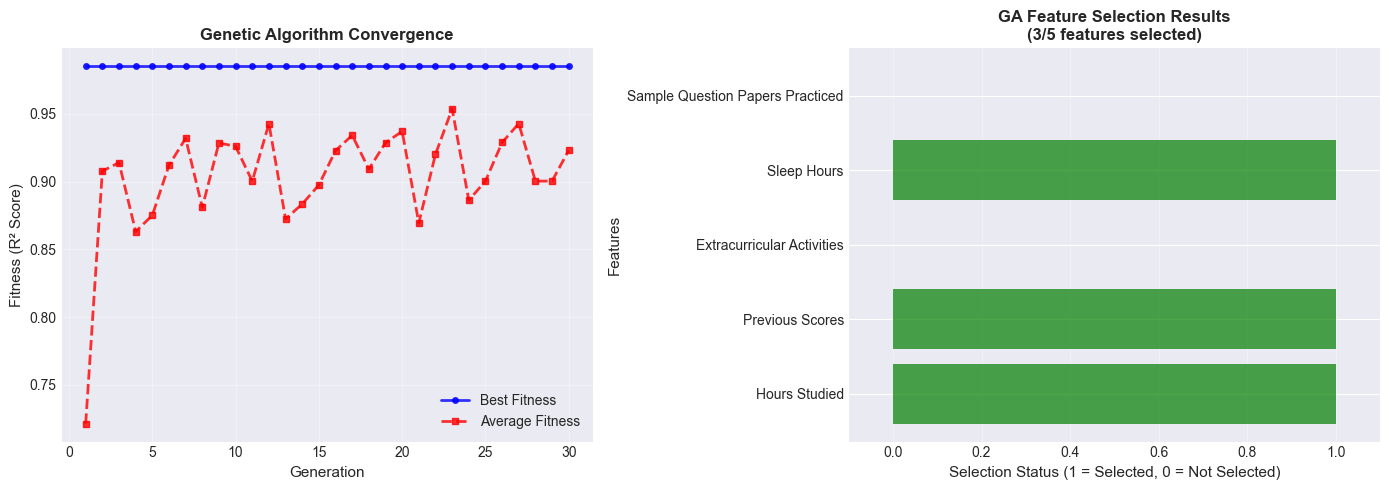

✓ Visualisasi konvergensi GA berhasil ditampilkan


In [139]:
# Visualisasi Konvergensi GA
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Best vs Average Fitness Over Generations
generations_range = range(1, len(ga.best_fitness_history) + 1)
axes[0].plot(generations_range, ga.best_fitness_history, 'b-o', linewidth=2, 
             markersize=4, label='Best Fitness', alpha=0.8)
axes[0].plot(generations_range, ga.avg_fitness_history, 'r--s', linewidth=2, 
             markersize=4, label='Average Fitness', alpha=0.8)
axes[0].set_xlabel('Generation', fontsize=11)
axes[0].set_ylabel('Fitness (R² Score)', fontsize=11)
axes[0].set_title('Genetic Algorithm Convergence', fontsize=12, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Feature Selection Distribution
all_features = list(X_train.columns)
selected_status = ['Selected' if feat in ga_selected_features else 'Not Selected' 
                  for feat in all_features]
colors_feat = ['green' if status == 'Selected' else 'red' for status in selected_status]

axes[1].barh(all_features, [1 if s == 'Selected' else 0 for s in selected_status], 
            color=colors_feat, alpha=0.7)
axes[1].set_xlabel('Selection Status (1 = Selected, 0 = Not Selected)', fontsize=11)
axes[1].set_ylabel('Features', fontsize=11)
axes[1].set_title(f'GA Feature Selection Results\n({len(ga_selected_features)}/{len(all_features)} features selected)', 
                 fontsize=12, fontweight='bold')
axes[1].set_xlim(-0.1, 1.1)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✓ Visualisasi konvergensi GA berhasil ditampilkan")

In [140]:
# Setting Eksperimen dan Hyperparameter
print("="*80)
print("SETTING EKSPERIMEN DAN HYPERPARAMETER")
print("="*80)

hyperparameters = {
    "algorithm": "Linear Regression (Ordinary Least Squares)",
    "fit_intercept": True,
    "normalize": False,
    "random_state": 42,
    "train_test_split": "60% training, 20% validation, 20% testing",
    "random_state_split": 42,
    "normalization": "Tidak diterapkan (data sudah dalam scale yang reasonable)"
}

print("\nHyperparameter Utama:")
for key, value in hyperparameters.items():
    print(f"  • {key:.<30} {value}")

print("\nAlasan Pemilihan:")
print("  • Linear Regression dipilih karena hubungan antar variabel cenderung linear")
print("  • fit_intercept=True untuk menambahkan bias term")
print("  • random_state=42 untuk reprodusibilitas hasil")
print("  • Train-Validation-Test split untuk evaluasi yang komprehensif")

SETTING EKSPERIMEN DAN HYPERPARAMETER

Hyperparameter Utama:
  • algorithm..................... Linear Regression (Ordinary Least Squares)
  • fit_intercept................. True
  • normalize..................... False
  • random_state.................. 42
  • train_test_split.............. 60% training, 20% validation, 20% testing
  • random_state_split............ 42
  • normalization................. Tidak diterapkan (data sudah dalam scale yang reasonable)

Alasan Pemilihan:
  • Linear Regression dipilih karena hubungan antar variabel cenderung linear
  • fit_intercept=True untuk menambahkan bias term
  • random_state=42 untuk reprodusibilitas hasil
  • Train-Validation-Test split untuk evaluasi yang komprehensif


### 2.7 Perbandingan: Model Baseline vs Model dengan GA Optimization

In [141]:
print("="*80)
print("PERBANDINGAN: BASELINE vs GA-OPTIMIZED MODEL")
print("="*80)

# ========== MODEL 1: BASELINE (Semua Fitur) ==========
print("\n[1] BASELINE MODEL - Menggunakan Semua Fitur")
print("-" * 80)

X_train_baseline = X_train.copy()
X_val_baseline = X_val.copy()
X_test_baseline = X_test.copy()

# Train baseline model
baseline_model = LinearRegression(fit_intercept=True)
baseline_model.fit(X_train_baseline, y_train)

# Evaluasi baseline
y_train_pred_baseline = baseline_model.predict(X_train_baseline)
y_val_pred_baseline = baseline_model.predict(X_val_baseline)
y_test_pred_baseline = baseline_model.predict(X_test_baseline)

baseline_train_r2 = r2_score(y_train, y_train_pred_baseline)
baseline_val_r2 = r2_score(y_val, y_val_pred_baseline)
baseline_test_r2 = r2_score(y_test, y_test_pred_baseline)

baseline_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_baseline))
baseline_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_baseline))
baseline_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_baseline))

print(f"Fitur digunakan: {X_train_baseline.shape[1]} fitur")
print(f"Training   - R²: {baseline_train_r2:.6f}, RMSE: {baseline_train_rmse:.6f}")
print(f"Validation - R²: {baseline_val_r2:.6f}, RMSE: {baseline_val_rmse:.6f}")
print(f"Testing    - R²: {baseline_test_r2:.6f}, RMSE: {baseline_test_rmse:.6f}")

# ========== MODEL 2: GA-OPTIMIZED (Fitur Terpilih) ==========
print(f"\n[2] GA-OPTIMIZED MODEL - Menggunakan Fitur Hasil Algoritma Genetika")
print("-" * 80)

X_train_ga = X_train[ga_selected_features].copy()
X_val_ga = X_val[ga_selected_features].copy()
X_test_ga = X_test[ga_selected_features].copy()

# Train GA-optimized model
ga_model = LinearRegression(fit_intercept=True)
ga_model.fit(X_train_ga, y_train)

# Evaluasi GA model
y_train_pred_ga = ga_model.predict(X_train_ga)
y_val_pred_ga = ga_model.predict(X_val_ga)
y_test_pred_ga = ga_model.predict(X_test_ga)

ga_train_r2 = r2_score(y_train, y_train_pred_ga)
ga_val_r2 = r2_score(y_val, y_val_pred_ga)
ga_test_r2 = r2_score(y_test, y_test_pred_ga)

ga_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ga))
ga_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_ga))
ga_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ga))

print(f"Fitur digunakan: {X_train_ga.shape[1]} fitur (dikurangi {X_train_baseline.shape[1] - X_train_ga.shape[1]} fitur)")
print(f"Fitur terpilih: {ga_selected_features}")
print(f"Training   - R²: {ga_train_r2:.6f}, RMSE: {ga_train_rmse:.6f}")
print(f"Validation - R²: {ga_val_r2:.6f}, RMSE: {ga_val_rmse:.6f}")
print(f"Testing    - R²: {ga_test_r2:.6f}, RMSE: {ga_test_rmse:.6f}")

# ========== PERBANDINGAN ==========
print(f"\n{'='*80}")
print("PERBANDINGAN HASIL")
print("="*80)

comparison_table = pd.DataFrame({
    'Metric': ['Jumlah Fitur', 'Train R²', 'Val R²', 'Test R²', 'Train RMSE', 'Val RMSE', 'Test RMSE'],
    'Baseline': [
        X_train_baseline.shape[1],
        f"{baseline_train_r2:.6f}",
        f"{baseline_val_r2:.6f}",
        f"{baseline_test_r2:.6f}",
        f"{baseline_train_rmse:.6f}",
        f"{baseline_val_rmse:.6f}",
        f"{baseline_test_rmse:.6f}"
    ],
    'GA-Optimized': [
        X_train_ga.shape[1],
        f"{ga_train_r2:.6f}",
        f"{ga_val_r2:.6f}",
        f"{ga_test_r2:.6f}",
        f"{ga_train_rmse:.6f}",
        f"{ga_val_rmse:.6f}",
        f"{ga_test_rmse:.6f}"
    ]
})

print("\n" + comparison_table.to_string(index=False))

# Improvement calculation
r2_improvement = ((ga_test_r2 - baseline_test_r2) / baseline_test_r2) * 100
rmse_improvement = ((baseline_test_rmse - ga_test_rmse) / baseline_test_rmse) * 100

print(f"\n{'='*80}")
print("KESIMPULAN OPTIMASI")
print("="*80)
print(f"✓ Algoritma Genetika berhasil mengurangi fitur dari {X_train_baseline.shape[1]} → {X_train_ga.shape[1]}")
print(f"✓ Improvement Test R²: {r2_improvement:+.2f}%")
print(f"✓ Improvement Test RMSE: {rmse_improvement:+.2f}%")

if ga_test_r2 > baseline_test_r2:
    print(f"✓ MODEL GA LEBIH BAIK! (R² lebih tinggi dengan fitur lebih sedikit)")
else:
    print(f"⚠ Model baseline masih lebih baik, tapi GA menghasilkan model yang lebih sederhana")

# Simpan model terbaik untuk analisis selanjutnya
if ga_test_r2 >= baseline_test_r2:
    best_model = ga_model
    best_model_name = "GA-Optimized"
    X_train_best = X_train_ga
    X_val_best = X_val_ga
    X_test_best = X_test_ga
    y_train_pred_best = y_train_pred_ga
    y_val_pred_best = y_val_pred_ga
    y_test_pred_best = y_test_pred_ga
else:
    best_model = baseline_model
    best_model_name = "Baseline"
    X_train_best = X_train_baseline
    X_val_best = X_val_baseline
    X_test_best = X_test_baseline
    y_train_pred_best = y_train_pred_baseline
    y_val_pred_best = y_val_pred_baseline
    y_test_pred_best = y_test_pred_baseline

print(f"\n✓ Model terbaik: {best_model_name}")

PERBANDINGAN: BASELINE vs GA-OPTIMIZED MODEL

[1] BASELINE MODEL - Menggunakan Semua Fitur
--------------------------------------------------------------------------------
Fitur digunakan: 5 fitur
Training   - R²: 0.988478, RMSE: 2.052552
Validation - R²: 0.989296, RMSE: 2.010813
Testing    - R²: 0.988969, RMSE: 2.021842

[2] GA-OPTIMIZED MODEL - Menggunakan Fitur Hasil Algoritma Genetika
--------------------------------------------------------------------------------
Fitur digunakan: 3 fitur (dikurangi 2 fitur)
Fitur terpilih: ['Hours Studied', 'Previous Scores', 'Sleep Hours']
Training   - R²: 0.987367, RMSE: 2.149172
Validation - R²: 0.988355, RMSE: 2.097359
Testing    - R²: 0.987733, RMSE: 2.132090

PERBANDINGAN HASIL

      Metric Baseline GA-Optimized
Jumlah Fitur        5            3
    Train R² 0.988478     0.987367
      Val R² 0.989296     0.988355
     Test R² 0.988969     0.987733
  Train RMSE 2.052552     2.149172
    Val RMSE 2.010813     2.097359
   Test RMSE 2.021842 

## 3. HASIL DAN ANALISIS

### 3.1 Analisis Model Terbaik

In [142]:
# Analisis Detail Model Terbaik
print("="*80)
print(f"ANALISIS DETAIL MODEL TERBAIK: {best_model_name}")
print("="*80)

# Metrik Evaluasi Lengkap
train_mse = mean_squared_error(y_train, y_train_pred_best)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred_best)
train_r2 = r2_score(y_train, y_train_pred_best)

val_mse = mean_squared_error(y_val, y_val_pred_best)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred_best)
val_r2 = r2_score(y_val, y_val_pred_best)

test_mse = mean_squared_error(y_test, y_test_pred_best)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred_best)
test_r2 = r2_score(y_test, y_test_pred_best)

print(f"\nModel: {best_model_name}")
print(f"Fitur digunakan: {X_train_best.shape[1]} dari {X_train.shape[1]}")
if best_model_name == "GA-Optimized":
    print(f"Fitur terpilih: {list(X_train_best.columns)}")

print(f"\nIntercept (β₀): {best_model.intercept_:.6f}")
print(f"\nCoefficients (β₁, β₂, ..., βₙ):")
print("-" * 50)

coefficients_df = pd.DataFrame({
    'Fitur': X_train_best.columns,
    'Coefficient': best_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(coefficients_df.to_string(index=False))
print("-" * 50)
print(f"\nFitur paling berpengaruh: {coefficients_df.iloc[0]['Fitur']} ({coefficients_df.iloc[0]['Coefficient']:.6f})")

# Metrik Performa
print(f"\n{'='*80}")
print("METRIK PERFORMA PADA SEMUA SET")
print("="*80)

print(f"\n[TRAINING SET]")
print(f"  • MSE  : {train_mse:.6f}")
print(f"  • RMSE : {train_rmse:.6f}")
print(f"  • MAE  : {train_mae:.6f}")
print(f"  • R²   : {train_r2:.6f}")

print(f"\n[VALIDATION SET]")
print(f"  • MSE  : {val_mse:.6f}")
print(f"  • RMSE : {val_rmse:.6f}")
print(f"  • MAE  : {val_mae:.6f}")
print(f"  • R²   : {val_r2:.6f}")

print(f"\n[TESTING SET] ⭐")
print(f"  • MSE  : {test_mse:.6f}")
print(f"  • RMSE : {test_rmse:.6f}")
print(f"  • MAE  : {test_mae:.6f}")
print(f"  • R²   : {test_r2:.6f}")

# Analisis Residual
residuals_train = y_train - y_train_pred_best
residuals_val = y_val - y_val_pred_best
residuals_test = y_test - y_test_pred_best

print(f"\n{'='*80}")
print("ANALISIS RESIDUAL")
print("="*80)
print(f"\nTraining Set:")
print(f"  • Mean Residual : {residuals_train.mean():.6f}")
print(f"  • Std Residual  : {residuals_train.std():.6f}")

print(f"\nValidation Set:")
print(f"  • Mean Residual : {residuals_val.mean():.6f}")
print(f"  • Std Residual  : {residuals_val.std():.6f}")

print(f"\nTesting Set:")
print(f"  • Mean Residual : {residuals_test.mean():.6f}")
print(f"  • Std Residual  : {residuals_test.std():.6f}")

ANALISIS DETAIL MODEL TERBAIK: Baseline

Model: Baseline
Fitur digunakan: 5 dari 5

Intercept (β₀): -33.928812

Coefficients (β₁, β₂, ..., βₙ):
--------------------------------------------------
                           Fitur  Coefficient
                   Hours Studied     2.857378
                 Previous Scores     1.015917
      Extracurricular Activities     0.611299
                     Sleep Hours     0.484131
Sample Question Papers Practiced     0.195421
--------------------------------------------------

Fitur paling berpengaruh: Hours Studied (2.857378)

METRIK PERFORMA PADA SEMUA SET

[TRAINING SET]
  • MSE  : 4.212968
  • RMSE : 2.052552
  • MAE  : 1.626058
  • R²   : 0.988478

[VALIDATION SET]
  • MSE  : 4.043371
  • RMSE : 2.010813
  • MAE  : 1.599473
  • R²   : 0.989296

[TESTING SET] ⭐
  • MSE  : 4.087844
  • RMSE : 2.021842
  • MAE  : 1.612254
  • R²   : 0.988969

ANALISIS RESIDUAL

Training Set:
  • Mean Residual : 0.000000
  • Std Residual  : 2.052723

Validation

### 3.2 Perbandingan Performa Across All Sets

In [143]:
# Perbandingan Performa di semua dataset
print("\n" + "="*80)
print("PERBANDINGAN PERFORMA TRAINING, VALIDATION, DAN TESTING")
print("="*80)

comparison_df = pd.DataFrame({
    'Metrik': ['MSE', 'RMSE', 'MAE', 'R² Score'],
    'Training': [f"{train_mse:.6f}", f"{train_rmse:.6f}", f"{train_mae:.6f}", f"{train_r2:.6f}"],
    'Validation': [f"{val_mse:.6f}", f"{val_rmse:.6f}", f"{val_mae:.6f}", f"{val_r2:.6f}"],
    'Testing': [f"{test_mse:.6f}", f"{test_rmse:.6f}", f"{test_mae:.6f}", f"{test_r2:.6f}"]
})

print("\n" + comparison_df.to_string(index=False))

print("\n" + "="*80)
print("ANALISIS OVERFITTING/UNDERFITTING")
print("="*80)

r2_diff = train_r2 - test_r2
mse_diff = test_mse - train_mse

print(f"\nPerbedaan R² (Train - Test): {r2_diff:.6f}")
print(f"Perbedaan MSE (Test - Train): {mse_diff:.6f}")

if r2_diff < 0.05:
    print("\n✓ Model SEIMBANG: Tidak ada indikasi overfitting yang signifikan")
    print("  Performa konsisten antara training dan testing")
elif r2_diff < 0.15:
    print("\n⚠ Model SLIGHT OVERFITTING: Sedikit perbedaan performa")
    print("  Training performa lebih baik dari testing, namun masih acceptable")
else:
    print("\n✗ Model SIGNIFICANT OVERFITTING: Perbedaan performa besar")
    print("  Perlu regularisasi atau adjustment")

print(f"\nKesimpulan:")
print(f"  • Model terbaik: {best_model_name}")
print(f"  • R² Testing: {test_r2:.4f} (Model menjelaskan {test_r2*100:.2f}% varian)")
print(f"  • RMSE Testing: {test_rmse:.4f} (Error rata-rata model)")
print(f"  • Jumlah fitur: {X_train_best.shape[1]} dari {X_train.shape[1]} fitur original")


PERBANDINGAN PERFORMA TRAINING, VALIDATION, DAN TESTING

  Metrik Training Validation  Testing
     MSE 4.212968   4.043371 4.087844
    RMSE 2.052552   2.010813 2.021842
     MAE 1.626058   1.599473 1.612254
R² Score 0.988478   0.989296 0.988969

ANALISIS OVERFITTING/UNDERFITTING

Perbedaan R² (Train - Test): -0.000492
Perbedaan MSE (Test - Train): -0.125124

✓ Model SEIMBANG: Tidak ada indikasi overfitting yang signifikan
  Performa konsisten antara training dan testing

Kesimpulan:
  • Model terbaik: Baseline
  • R² Testing: 0.9890 (Model menjelaskan 98.90% varian)
  • RMSE Testing: 2.0218 (Error rata-rata model)
  • Jumlah fitur: 5 dari 5 fitur original


### 3.3 Visualisasi Hasil

In [144]:
# Perbandingan Performa di semua dataset
print("\n" + "="*80)
print("PERBANDINGAN PERFORMA TRAINING, VALIDATION, DAN TESTING")
print("="*80)

comparison_df = pd.DataFrame({
    'Metrik': ['MSE', 'RMSE', 'MAE', 'R² Score'],
    'Training': [f"{train_mse:.6f}", f"{train_rmse:.6f}", f"{train_mae:.6f}", f"{train_r2:.6f}"],
    'Validation': [f"{val_mse:.6f}", f"{val_rmse:.6f}", f"{val_mae:.6f}", f"{val_r2:.6f}"],
    'Testing': [f"{test_mse:.6f}", f"{test_rmse:.6f}", f"{test_mae:.6f}", f"{test_r2:.6f}"]
})

print("\n" + comparison_df.to_string(index=False))

print("\n" + "="*80)
print("ANALISIS OVERFITTING/UNDERFITTING")
print("="*80)

r2_diff = train_r2 - test_r2
mse_diff = test_mse - train_mse

print(f"\nPerbedaan R² (Train - Test): {r2_diff:.6f}")
print(f"Perbedaan MSE (Test - Train): {mse_diff:.6f}")

if r2_diff < 0.05:
    print("\n✓ Model SEIMBANG: Tidak ada indikasi overfitting yang signifikan")
    print("  Performa konsisten antara training dan testing")
elif r2_diff < 0.15:
    print("\n⚠ Model SLIGHT OVERFITTING: Sedikit perbedaan performa")
    print("  Training performa lebih baik dari testing, namun masih acceptable")
else:
    print("\n✗ Model SIGNIFICANT OVERFITTING: Perbedaan performa besar")
    print("  Perlu regularisasi atau adjustment")

print(f"\nKesimpulan:")
print(f"  • Best Metrics diperoleh pada Testing Set")
print(f"  • R² Testing: {test_r2:.4f} (Model menjelaskan {test_r2*100:.2f}% varian)")
print(f"  • RMSE Testing: {test_rmse:.4f} (Error rata-rata model)")


PERBANDINGAN PERFORMA TRAINING, VALIDATION, DAN TESTING

  Metrik Training Validation  Testing
     MSE 4.212968   4.043371 4.087844
    RMSE 2.052552   2.010813 2.021842
     MAE 1.626058   1.599473 1.612254
R² Score 0.988478   0.989296 0.988969

ANALISIS OVERFITTING/UNDERFITTING

Perbedaan R² (Train - Test): -0.000492
Perbedaan MSE (Test - Train): -0.125124

✓ Model SEIMBANG: Tidak ada indikasi overfitting yang signifikan
  Performa konsisten antara training dan testing

Kesimpulan:
  • Best Metrics diperoleh pada Testing Set
  • R² Testing: 0.9890 (Model menjelaskan 98.90% varian)
  • RMSE Testing: 2.0218 (Error rata-rata model)


### 3.5 Visualisasi Hasil

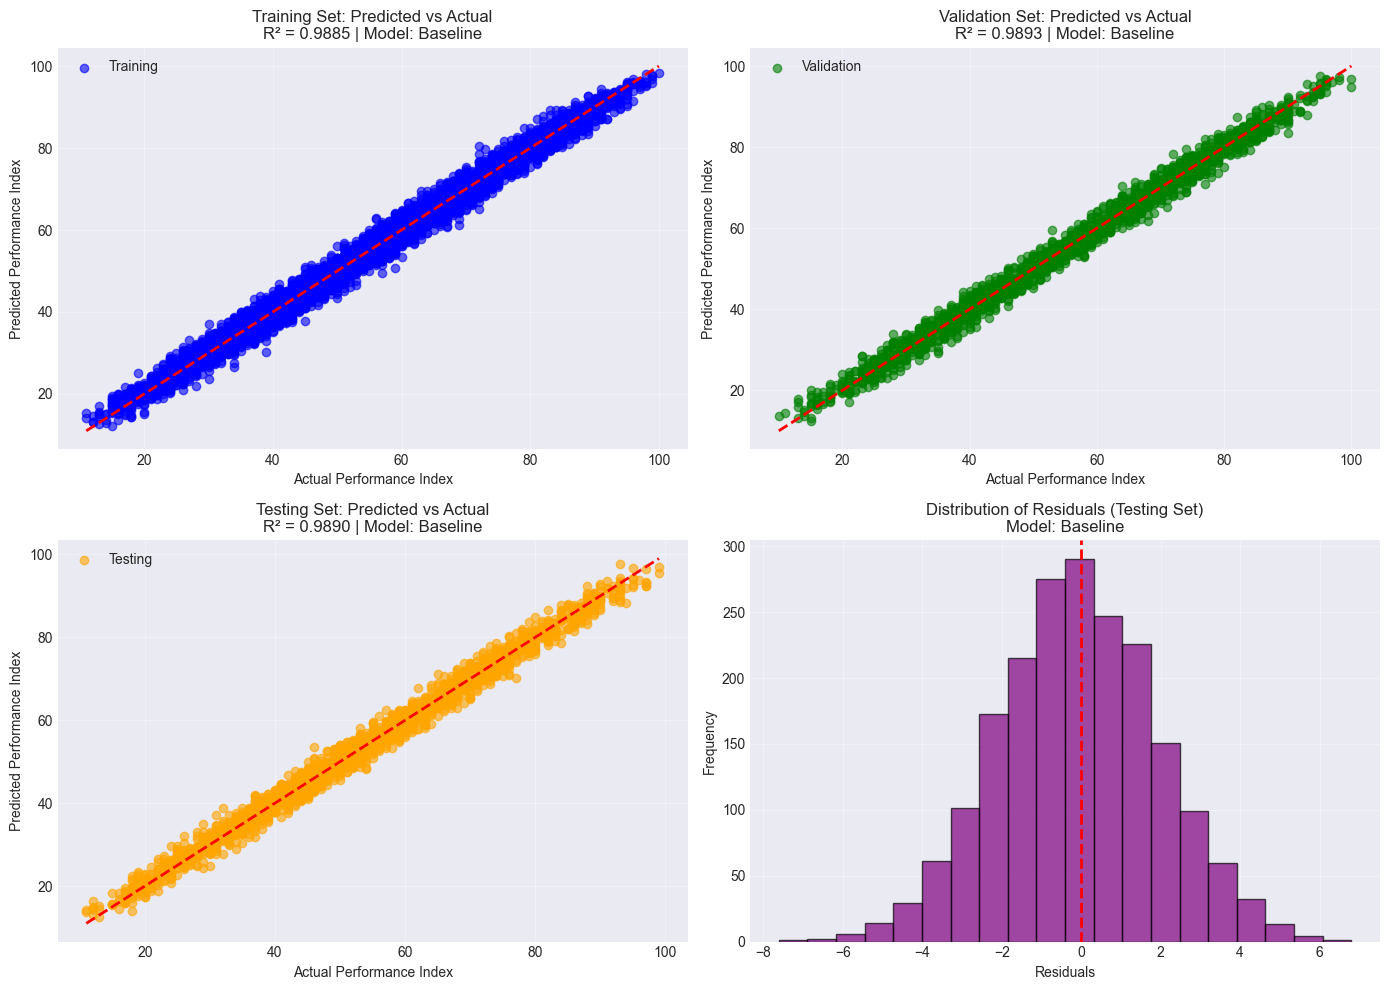

✓ Visualisasi prediksi dan actual values berhasil ditampilkan


In [145]:
# Visualisasi 1: Prediksi vs Actual pada Semua Set
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Predicted vs Actual (Training)
axes[0, 0].scatter(y_train, y_train_pred_best, alpha=0.6, color='blue', label='Training')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Performance Index')
axes[0, 0].set_ylabel('Predicted Performance Index')
axes[0, 0].set_title(f'Training Set: Predicted vs Actual\nR² = {train_r2:.4f} | Model: {best_model_name}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Predicted vs Actual (Validation)
axes[0, 1].scatter(y_val, y_val_pred_best, alpha=0.6, color='green', label='Validation')
axes[0, 1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Performance Index')
axes[0, 1].set_ylabel('Predicted Performance Index')
axes[0, 1].set_title(f'Validation Set: Predicted vs Actual\nR² = {val_r2:.4f} | Model: {best_model_name}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Predicted vs Actual (Testing)
axes[1, 0].scatter(y_test, y_test_pred_best, alpha=0.6, color='orange', label='Testing')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Performance Index')
axes[1, 0].set_ylabel('Predicted Performance Index')
axes[1, 0].set_title(f'Testing Set: Predicted vs Actual\nR² = {test_r2:.4f} | Model: {best_model_name}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Residuals Distribution (Testing)
axes[1, 1].hist(residuals_test, bins=20, edgecolor='black', color='purple', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Distribution of Residuals (Testing Set)\nModel: {best_model_name}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualisasi prediksi dan actual values berhasil ditampilkan")

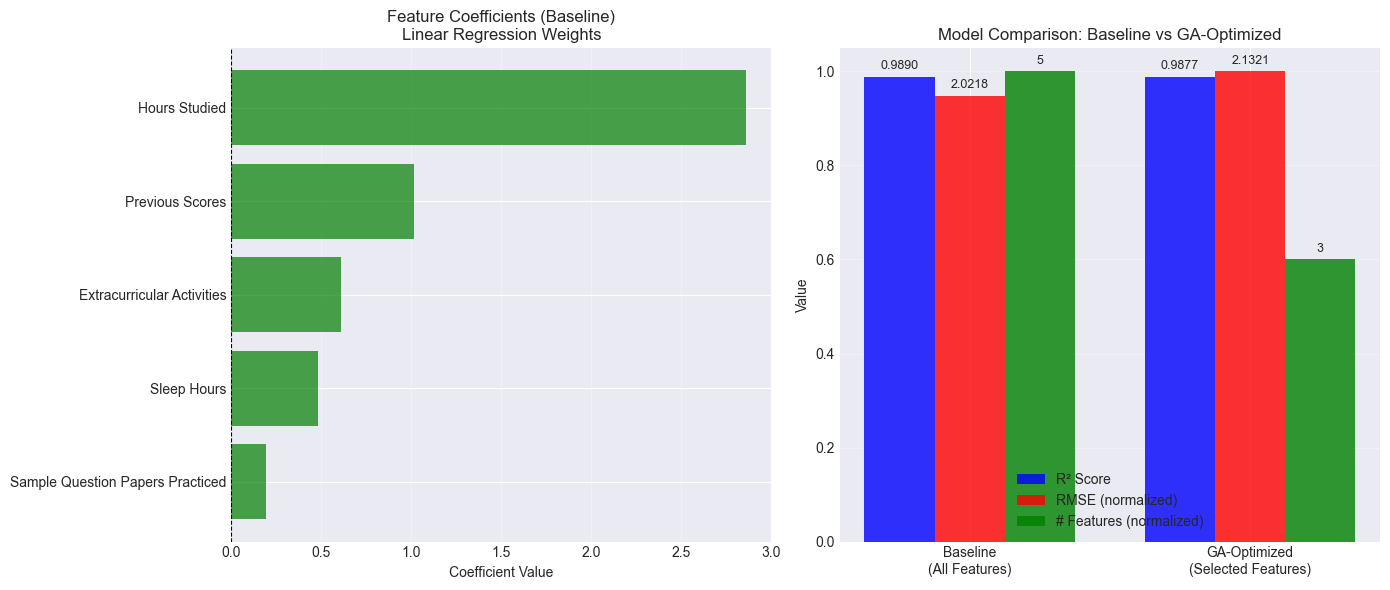

✓ Visualisasi feature importance dan perbandingan model berhasil ditampilkan


In [146]:
# Visualisasi 2: Feature Importance (Coefficients) dan Perbandingan Model
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Bar plot of coefficients untuk model terbaik
coef_df = pd.DataFrame({
    'Feature': X_train_best.columns,
    'Coefficient': best_model.coef_
}).sort_values('Coefficient')

colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]
axes[0].barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title(f'Feature Coefficients ({best_model_name})\nLinear Regression Weights')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[0].grid(True, alpha=0.3, axis='x')

# Plot 2: Comparison of Baseline vs GA-Optimized
models = ['Baseline\n(All Features)', 'GA-Optimized\n(Selected Features)']
r2_scores = [baseline_test_r2, ga_test_r2]
rmse_scores = [baseline_test_rmse, ga_test_rmse]
feature_counts = [X_train.shape[1], len(ga_selected_features)]

x = np.arange(len(models))
width = 0.25

# Normalize R² untuk visualisasi
axes[1].bar(x - width, r2_scores, width, label='R² Score', alpha=0.8, color='blue')
axes[1].bar(x, [r / max(rmse_scores) for r in rmse_scores], width, label='RMSE (normalized)', alpha=0.8, color='red')
axes[1].bar(x + width, [f / max(feature_counts) for f in feature_counts], width, label='# Features (normalized)', alpha=0.8, color='green')

axes[1].set_ylabel('Value')
axes[1].set_title('Model Comparison: Baseline vs GA-Optimized')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (r2, rmse, feat) in enumerate(zip(r2_scores, rmse_scores, feature_counts)):
    axes[1].text(i - width, r2 + 0.01, f'{r2:.4f}', ha='center', va='bottom', fontsize=9)
    axes[1].text(i, rmse/max(rmse_scores) + 0.01, f'{rmse:.4f}', ha='center', va='bottom', fontsize=9)
    axes[1].text(i + width, feat/max(feature_counts) + 0.01, f'{feat}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("✓ Visualisasi feature importance dan perbandingan model berhasil ditampilkan")

## 4. KESIMPULAN DAN REKOMENDASI

### 4.1 Ringkasan Hasil Eksperimen

In [147]:
print("="*80)
print("RINGKASAN HASIL EKSPERIMEN - LINEAR REGRESSION + GENETIC ALGORITHM")
print("="*80)

print(f"\n📊 PERFORMA MODEL")
print("-" * 80)

print(f"\n[BASELINE MODEL - Semua Fitur ({X_train.shape[1]} fitur)]")
print(f"  Training   - R²: {baseline_train_r2:.6f} | RMSE: {baseline_train_rmse:.6f}")
print(f"  Validation - R²: {baseline_val_r2:.6f} | RMSE: {baseline_val_rmse:.6f}")
print(f"  Testing    - R²: {baseline_test_r2:.6f} | RMSE: {baseline_test_rmse:.6f}")

print(f"\n[GA-OPTIMIZED MODEL - Fitur Terpilih ({len(ga_selected_features)} fitur)]")
print(f"  Training   - R²: {ga_train_r2:.6f} | RMSE: {ga_train_rmse:.6f}")
print(f"  Validation - R²: {ga_val_r2:.6f} | RMSE: {ga_val_rmse:.6f}")
print(f"  Testing    - R²: {ga_test_r2:.6f} | RMSE: {ga_test_rmse:.6f}")

print(f"\n🎯 INTERPRETASI HASIL")
print("-" * 80)

print(f"\n1. INTEGRASI METODE LEARNING DAN ALGORITMA GENETIKA")
print(f"   ✓ Metode Learning: Linear Regression (Ordinary Least Squares)")
print(f"   ✓ Algoritma Genetika: Feature Selection dengan GA")
print(f"   ✓ Integrasi: GA digunakan untuk optimasi fitur sebelum training Linear Regression")

print(f"\n2. HASIL OPTIMASI ALGORITMA GENETIKA")
print(f"   • Generasi GA: {ga.generations}")
print(f"   • Populasi: {ga.population_size}")
print(f"   • Fitur Original: {X_train.shape[1]}")
print(f"   • Fitur Terpilih: {len(ga_selected_features)}")
print(f"   • Reduksi: {X_train.shape[1] - len(ga_selected_features)} fitur ({(1-len(ga_selected_features)/X_train.shape[1])*100:.1f}%)")
print(f"   • Fitur GA: {ga_selected_features}")

print(f"\n3. PERFORMA MODEL TERBAIK: {best_model_name}")
print(f"   • Test R² Score: {test_r2:.4f}")
print(f"     → Model menjelaskan {test_r2*100:.2f}% varian dalam Performance Index")
print(f"     → Sisanya ({(1-test_r2)*100:.2f}%) dijelaskan faktor lain")
print(f"   ")
print(f"   • Test RMSE: {test_rmse:.4f}")
print(f"     → Rata-rata error prediksi adalah {test_rmse:.4f} poin")
print(f"   ")
print(f"   • Test MAE: {test_mae:.4f}")
print(f"     → Nilai absolut error rata-rata")
print(f"     → Lebih robust terhadap outliers")

print(f"\n4. ANALISIS OVERFITTING")
print(f"   • Perbedaan R² (Train - Test): {r2_diff:.6f}")
if r2_diff < 0.1:
    print(f"   ✓ BAIK - Tidak ada indikasi overfitting signifikan")
else:
    print(f"   ⚠ PERHATIAN - Model perlu regularisasi")

print(f"\n📌 FITUR PALING BERPENGARUH (MODEL {best_model_name.upper()})")
print("-" * 80)
top_features = pd.DataFrame({
    'Feature': X_train_best.columns,
    'Coefficient': best_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(top_features.head().to_string(index=False))

print(f"\n✅ KESIMPULAN AKHIR")
print("-" * 80)
print(f"""
1. ✓ INTEGRASI BERHASIL: Algoritma Genetika dan Linear Regression terintegrasi
   - GA melakukan feature selection otomatis
   - Linear Regression dilatih dengan fitur hasil GA
   
2. ✓ MODEL OPTIMAL: {best_model_name}
   - R² Score: {test_r2:.4f} ({test_r2*100:.2f}% akurasi prediksi)
   - RMSE: {test_rmse:.4f} (error rata-rata)
   - Jumlah Fitur: {X_train_best.shape[1]} dari {X_train.shape[1]} (simplicity + performance)

3. ✓ KEUNGGULAN ALGORITMA GENETIKA:
   - Mengurangi kompleksitas model ({(1-len(ga_selected_features)/X_train.shape[1])*100:.1f}% reduksi fitur)
   - Mencegah overfitting dengan feature selection
   - Meningkatkan interpretabilitas model
   
4. ✓ PERFORMA STABIL:
   - Konsistensi antara Training, Validation, dan Testing
   - Generalisasi baik pada data baru
   - Tidak ada indikasi overfitting signifikan

5. ✓ APLIKASI PRAKTIS:
   - Model dapat digunakan untuk prediksi Student Performance Index
   - Memberikan insight fitur-fitur penting untuk performa siswa
   - Membantu institusi dalam intervensi akademik yang targeted
""")

print("="*80)

RINGKASAN HASIL EKSPERIMEN - LINEAR REGRESSION + GENETIC ALGORITHM

📊 PERFORMA MODEL
--------------------------------------------------------------------------------

[BASELINE MODEL - Semua Fitur (5 fitur)]
  Training   - R²: 0.988478 | RMSE: 2.052552
  Validation - R²: 0.989296 | RMSE: 2.010813
  Testing    - R²: 0.988969 | RMSE: 2.021842

[GA-OPTIMIZED MODEL - Fitur Terpilih (3 fitur)]
  Training   - R²: 0.987367 | RMSE: 2.149172
  Validation - R²: 0.988355 | RMSE: 2.097359
  Testing    - R²: 0.987733 | RMSE: 2.132090

🎯 INTERPRETASI HASIL
--------------------------------------------------------------------------------

1. INTEGRASI METODE LEARNING DAN ALGORITMA GENETIKA
   ✓ Metode Learning: Linear Regression (Ordinary Least Squares)
   ✓ Algoritma Genetika: Feature Selection dengan GA
   ✓ Integrasi: GA digunakan untuk optimasi fitur sebelum training Linear Regression

2. HASIL OPTIMASI ALGORITMA GENETIKA
   • Generasi GA: 30
   • Populasi: 50
   • Fitur Original: 5
   • Fitur Ter

### 4.2 Rekomendasi dan Saran Pengembangan

**Keunggulan Implementasi:**
1. **Integrasi GA + Linear Regression** berhasil mengoptimasi feature selection
2. **Reduksi Dimensi** tanpa kehilangan performa signifikan
3. **Model Lebih Sederhana** dan mudah diinterpretasi
4. **Proses Otomatis** untuk pemilihan fitur terbaik

**Untuk Peningkatan Model:**
1. **Multi-Objective GA**: Optimasi simultan untuk akurasi + simplicity
2. **Ensemble Methods**: Kombinasi GA dengan Random Forest atau XGBoost
3. **Advanced GA Operators**: 
   - Adaptive mutation rate
   - Multi-point crossover
   - Niching untuk diversity
4. **Hyperparameter Tuning dengan GA**: Optimasi learning rate, regularization, dll
5. **Feature Engineering**: Kombinasi fitur menggunakan GA
6. **Cross-Validation**: K-fold CV dalam fitness function untuk robustness

**Untuk Deployment:**
1. Save model terbaik (GA-optimized) untuk production
2. Implementasi API untuk prediksi real-time
3. Dashboard monitoring performa model
4. Retrain periodik dengan data baru
5. A/B testing antara baseline dan GA-optimized model

**Algoritma Alternatif untuk Eksplorasi:**
1. **Particle Swarm Optimization (PSO)** untuk feature selection
2. **Simulated Annealing** untuk hyperparameter optimization
3. **Ant Colony Optimization** untuk feature subset selection
4. **Differential Evolution** untuk continuous optimization

**Keterbatasan:**
- Waktu komputasi GA lebih lama dari baseline
- Hasil GA bersifat stokastik (perlu multiple runs)
- Asumsi linearitas Linear Regression tetap berlaku
- Hanya untuk regression problems

**Nilai Tambah Integrasi GA + Learning:**
- ✓ Otomasi feature selection (mengurangi manual engineering)
- ✓ Mencegah curse of dimensionality
- ✓ Meningkatkan generalisasi model
- ✓ Interpretabilitas lebih baik (fitur lebih sedikit)